In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

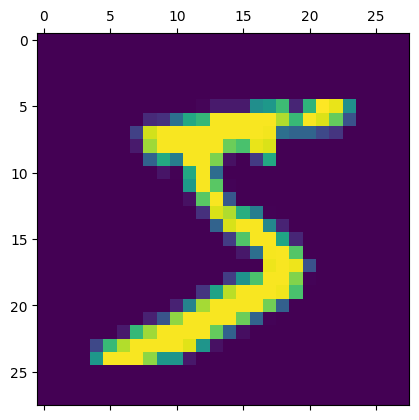

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [29]:
#scale les datas pour valeurs entre 0 et 1

X_train = X_train / 255
X_test = X_test / 255

In [23]:
#on applatit nos valeurs (matrice (28x28) devient (784x1) 
# 2D array to 1D array

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [24]:
X_train_flattened.shape

(60000, 784)

## Sans hidden layer 

In [26]:
model = keras.Sequential([
    # 10 car il y a 10 possibilitées (0,1,2,3,4...) et 784 car nb de input
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 211us/step - accuracy: 0.8116 - loss: 0.7166
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.9107 - loss: 0.3203
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step - accuracy: 0.9207 - loss: 0.2790
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.9228 - loss: 0.2731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.9246 - loss: 0.2685


In [27]:
#on évalue l'accurancy

model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - accuracy: 0.9143 - loss: 0.3068


[0.26917406916618347, 0.925599992275238]

In [31]:
#test pour valeur 0

y_predicted = model.predict(X_test_flattened)
y_predicted[0]
np.argmax(y_predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step


7

In [34]:
#créa confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    3,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   8,   10,  929,   16,    9,    3,   12,   12,   30,    3],
       [   4,    0,   20,  927,    0,   22,    2,   14,   14,    7],
       [   2,    1,    6,    1,  916,    0,    8,    7,    9,   32],
       [  12,    2,    4,   38,   12,  769,   14,   10,   26,    5],
       [  15,    3,    8,    1,    8,   11,  908,    2,    2,    0],
       [   2,    6,   21,    4,    5,    0,    0,  971,    1,   18],
       [  10,   10,    7,   31,    9,   28,    9,   15,  846,    9],
       [  11,    7,    1,   11,   26,    8,    0,   33,    3,  909]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

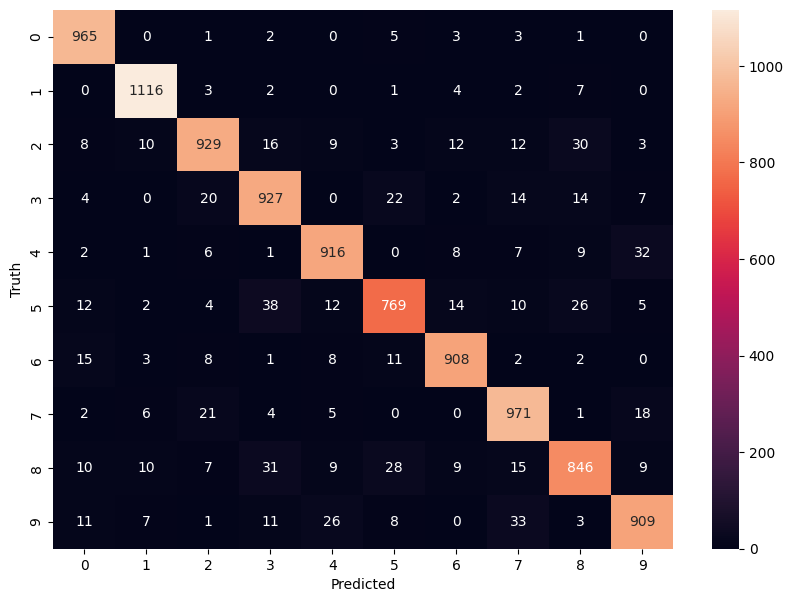

In [36]:
# on peut maintenant voir de façon visuel si c'est bon ou pas

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Ajout d'hidden layer 

In [48]:
## Maintenant on ajoute un hidden layer

model = keras.Sequential([
    #cette fois on utilise 100 neurones mais on peut choisir, on utilise relu comme activation function
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.8730 - loss: 0.4513
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.9612 - loss: 0.1298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.9753 - loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.9816 - loss: 0.0597
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - accuracy: 0.9855 - loss: 0.0491


In [40]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.9701 - loss: 0.0943


[0.07973307371139526, 0.975600004196167]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step


Text(95.72222222222221, 0.5, 'Truth')

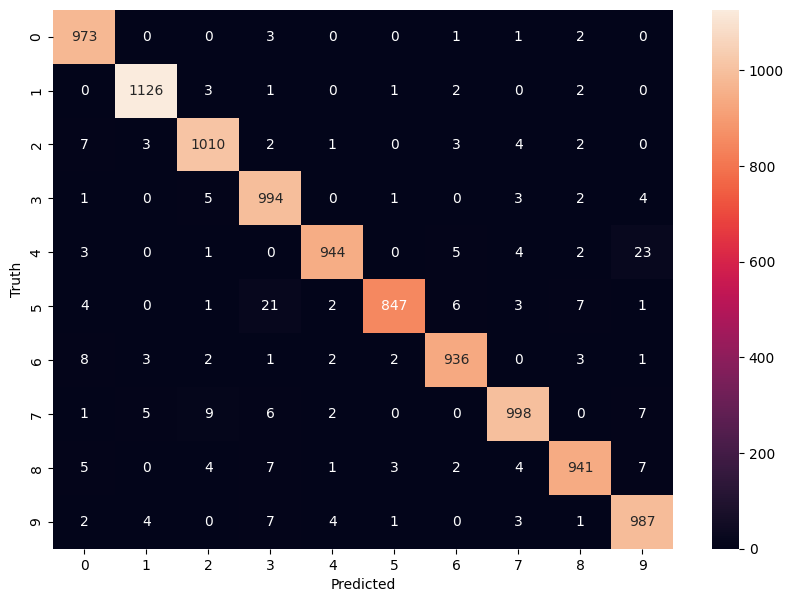

In [42]:
# si model parfait alors 0 dans les boites noirs

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##  Flatten layer so that we don't have to call .reshape on input dataset

In [45]:
## meme chose juste change 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 523us/step - accuracy: 0.5752 - loss: 1.6767
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step - accuracy: 0.8588 - loss: 0.5515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.8909 - loss: 0.4026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.9014 - loss: 0.3522
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step - accuracy: 0.9082 - loss: 0.3236
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.9144 - loss: 0.3045
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.9144 - loss: 0.2976
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.9180 - loss: 0.2855
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - accuracy: 0.9208 - loss: 0.2721
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.9236 - loss: 0.2650
